In [1]:
!pip install visualkeras
!pip install keras-tuner --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 992 kB 26.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 6.5 MB/s 
     |████████████████████████████████| 1.6 MB 3.7 MB/s 


In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import joblib
from sklearn.metrics import explained_variance_score, max_error, mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score, mean_absolute_percentage_error
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, recall_score, accuracy_score,f1_score, make_scorer, silhouette_score, mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold,RandomizedSearchCV

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold,RandomizedSearchCV

from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor

import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold,RandomizedSearchCV

from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor

import tensorflow as tf
from tensorflow import keras

from keras.wrappers.scikit_learn import KerasClassifier 
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras_tuner as kt
import pandas as pd
import numpy as np
from sklearn.metrics import explained_variance_score, max_error, mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score, mean_absolute_percentage_error
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, recall_score, accuracy_score,f1_score, make_scorer, silhouette_score, mean_squared_error
from sklearn.metrics import f1_score,  recall_score, precision_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


import tensorflow as tf
from tensorflow import keras
from keras.utils.vis_utils import plot_model
import visualkeras

np.random.seed(1)
tf.random.set_seed(1) 

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# [1] ★ Procesamiento del Lenguaje Natural

Observamos los datasets con la nueva columna **property_description**

In [5]:
x_train = pd.read_csv("./drive/MyDrive/datos/x_r_train.csv")
x_train

,latitud,longitud,neighborhood_encoded,type_Departamento,type_PH,rooms,bedrooms,property_description,surface_total,surface_covered
0,-34.601807,-58.469965,32,1,0,2,1,Corredor Responsable: MARIA ALEJANDRA GENOVEVA...,53.0,49.0
1,-34.580088,-58.424965,26,1,0,2,1,"Ubicado en Palermo, en una zona de muchos medi...",35.0,35.0
2,-34.551481,-58.452358,6,1,0,1,1,Corredor Responsable: Diego Enrique Mastrangel...,25.0,20.0
3,-34.632290,-58.464844,17,1,0,5,3,EXCELENTE DEPARTAMENTO DE 5 AMBIENTES DE 75 M2...,75.0,75.0
4,-34.549279,-58.463074,24,1,0,2,1,Muy buen departamento de 2 ambientes en O'Higg...,46.0,34.0
...,...,...,...,...,...,...,...,...,...,...
66836,-34.628714,-58.413872,8,1,0,3,2,Corredor Responsable: GRACIELA MENAZZI - CMCPD...,100.0,80.0
66837,-34.587318,-58.452157,12,1,0,2,1,UBICACIÓN CON MÚLTIPLES MEDIOS DE TRANSPORTE -...,61.0,59.0
66838,-34.597385,-58.426269,44,1,0,2,1,Hermoso departamento de dos ambientes con balc...,69.0,56.0
66839,-34.601109,-58.425161,2,1,0,2,1,"Hermosa Unidad de 2 ambientes con balcon, coch...",50.0,45.0


In [6]:
x_test = pd.read_csv("./drive/MyDrive/datos/x_r_test.csv")
x_test

,latitud,longitud,neighborhood_encoded,type_Departamento,type_PH,rooms,bedrooms,property_description,surface_total,surface_covered
0,-34.598679,-58.499717,55,1,0,1,0,Departamento 38m² 1 ambiente con Gas Natural e...,38.0,28.0
1,-34.574987,-58.420611,26,1,0,2,1,Depto muy exclusivo!!!! con excelente terraza ...,150.0,70.0
2,-34.581524,-58.403588,26,1,0,10,6,VENTA piso 10 ambientes 3 cocheras 2 bauleras...,520.0,500.0
3,-34.586527,-58.398279,26,1,0,2,1,Gran Oportunidad ! Re retasado!<br>Depto. 2 am...,43.0,41.0
4,-34.577647,-58.406064,26,1,0,4,3,<br>IMPECABLE UNIDAD DE 4 AMBIENTES CON DEPEN...,130.0,118.0
...,...,...,...,...,...,...,...,...,...,...
17313,-34.618986,-58.461856,17,1,0,3,2,Corredor Responsable: Maria Badino - CUCICBA ...,76.0,65.0
17314,-34.572933,-58.481700,54,1,0,2,1,OPORTUNIDAD<br>Dos ambientes en venta - Villa ...,46.0,41.0
17315,-34.587750,-58.406649,5,1,0,2,1,CPE. Corredor Silvia Serrano CPI 3809.<br>JUNC...,47.0,40.0
17316,-34.621437,-58.399588,38,1,0,3,2,Excelente departamento de 3 ambientes de 80 me...,80.0,72.0


Leemos los datasets con el target

In [8]:
y_test = pd.read_csv("./drive/MyDrive/datos/y_r_test.csv")
y_test

,price
0,85000.0
1,520000.0
2,3300000.0
3,87000.0
4,690000.0
...,...
17313,152000.0
17314,109000.0
17315,194000.0
17316,142000.0


In [9]:
y_train = pd.read_csv("./drive/MyDrive/datos/y_r_train.csv")
y_train

,price
0,80000.0
1,79900.0
2,69000.0
3,150000.0
4,85000.0
...,...
66836,175000.0
66837,122000.0
66838,178000.0
66839,135000.0


## a) ◆ Apliación del Dataset

**Algoritmos para la obtención de aspectos**: Para la obtención de aspectos decidimos utilizar un conteo para tener en cuenta las palabras que tienen mayor aparición en las descripciones y utilizando esta información, manualmente, tuvimos en cuenta las que nos parecieron más relevantes. De esta forma, aportamos mayor valor a la información del dataset.

In [10]:
repeated_words = x_train['property_description'].str.split(' ').explode().value_counts()
repeated_words.head(30)

de           785241
             704207
y            463227
con          366092
la           271870
en           257418
a            223626
el           158527
del          141868
que          132738
por          122794
al           115593
-            103333
un            99061
las           84312
para          81800
los           80938
se            59003
DE            51294
son           51080
es            47885
2             46189
una           45827
esta          37240
valor         36816
3             36805
cocina        35907
ambientes     35250
muy           33750
Av.           33369
Name: property_description, dtype: int64

Revisamos, de manera manual y por tandas, las palabras para detectar las que aportan un mayor valor para crear columnas en el dataset.

In [11]:
repeated_words.index[0:100]

Index(['de', '', 'y', 'con', 'la', 'en', 'a', 'el', 'del', 'que', 'por', 'al',
       '-', 'un', 'las', 'para', 'los', 'se', 'DE', 'son', 'es', '2', 'una',
       'esta', 'valor', '3', 'cocina', 'ambientes', 'muy', 'Av.', 'comedor',
       'baño', 'tu', 'no', 'x', 'Y', 'piso', 'CON', 'o', '/', 'hasta', 'A',
       'casa', 'No', '30%', 'propiedad.', 'inmueble', 'préstamo', 'Corredor',
       'cuota', 'balcón', 'Responsable:', 'departamento', 'Lendar', 'querés!',
       'podés.', 'Accedé', 'Simulá', '#', 'cuadras', 'ID', 'MLS', 'EN',
       'living', 'CUCICBA', 'medidas', 'personas', 'cuenta', '4', 'dos', 'El',
       'edificio', 'completo', 'propiedad', 'salida', 'Comprá', '\n\n',
       'encuentra', 'parte', 'pisos', 'frente', ',', 'amplio', 'Ley',
       'presente', 'vista', 'dormitorio', 'gran', '1', 'Las', 'espacio',
       'metros', 'placard', 'accesible', 'La', 'Los', 'discapacidades', 'su',
       'm2', 'sobre'],
      dtype='object')

In [12]:
repeated_words.index[100:200]

Index(['dormitorios', 'lo', 'principal', 'operaciones', 'acceso', 'como',
       'excelente', 'Cocina', 'valores', 'puede', 'intermediación', 'tiene',
       'bajo', 'zona', 'conclusión', 'aire', 'todos', 'barrio', 'NO',
       'terraza', 'Baño', 'inmobiliarias', 'planta', 'LA', 'este', 'cuadra',
       'corretaje', 'lavadero', 'corredor', 'operación', 'ubicado', 'unidades',
       'Todas', 'mesada', 'propietario', 'público', 'CMCPSI', 'ser', 'sin',
       'En', 'expensas', 'datos', 'responsable', 'tipo', 'servicio', 'Se',
       'Living', 'cumplimiento', 'entre', 'AMBIENTES', 'medidas,', 'físicas.',
       'inmobiliario', 'caliente', 'Excelente', 'doble', 'título', 'sus', 'AL',
       'acondicionado', 'muebles', 'patio', 'unidad', 'está', 'CPI', '+',
       'luminoso', 'calle', 'Departamento', 'más', 'y/o', 'madera', 'ejercen',
       'superficies', 'expensas,', 'buen', 'objeto', 'todo', 'primera',
       'inmobiliario.', 'Avenida', 'entrada', '5', 'ubicación', 'suite',
       'Villa'

In [13]:
repeated_words.index[200:300]

Index(['marca', 'pueden', 'Dormitorio', 'San', 'surgirán', 'cochera', 'e',
       'ventana', '$', 'venta', 'surgen', 'nos', 'supeditada', 'estado', 'Muy',
       'subte', 'integrada', 'servicios', 'características', '24',
       'funcionales,', 'previo', 'agua', 'posee', 'independiente',
       'servicios,', 'Piso', 'Parque', 'aproximadas', 'DEPARTAMENTO',
       'encontramos', 'descripciones', 'uno', 'PH', 'Juan', 'total', 'baños',
       'le', 'están', 'aviso.', 'parrilla', 'calidad', 'tres', 'documentación',
       'Edificio', 'normas', 'arquitectónicas', 'amplia', 'departamentos',
       'desde', 'amplios', 'hacia', 'comedor,', 'Contacto:', 'cual', 'estar',
       'Av', 'línea', 'oficina', 'publicación', 'acero', 'también', 'Buenos',
       'Banker', 'precios', 'información,', 'reales', 'ambientes,', 'primer',
       'cada', '6', 'líneas', 'donde', 'agentes/gestores', 'CSI', 'ambiente',
       'impuestos,', 'te', 'AFIP', 'Nº', 'frente,', 'gas', 'POR', 'cuatro',
       '2371', 'mts'

In [14]:
repeated_words.index[300:400]

Index(['baja', 'Código', 'Palermo', 'completo.', 'habitación', 'puertas',
       'gestión', 'Balcón', 'mas', 'Venta', 'dormitorios,', 'toilette',
       '(Línea', 'COCINA', 'contrafrente', 'serán', '<br>-', 'consultar',
       'alquiler', 'mismo', 'PISO', 'porcelanato', 'puerta', 'encuentran',
       '10', 'parquet', 'dependencia', 'modificado', 'MUY', 'general',
       'pasillo', 'completo,', 'totalmente', 'transporte', 'interiores',
       'Nacional', 'actualización', 'uso', 'esenciales', 'eventual', 'horno',
       'describe', 'debiéndose', 'efecto', 'QUE', 'requisitos', 'distribución',
       'fí', 'publicación.El', '9', 'precio', 'escalera', 'corrido', 'sujetos',
       'independiente.La', 'será', 'hace', 'calefacción', 'todas', 'través',
       'conexión', 'detalles', 'BAÑO', 'central', '(', 'gastos', 'otro',
       'propiedades', 'abierta', 'Comercial', 'VENTA', 'lugar', 'bien',
       'ventanal', 'Amplio', 'respectivo', 'cocheras', 'Nación', 'profesional',
       'SUM', 'Santa'

**En principio encontramos estos aspectos como relevantes para analizar**: terraza, balcon, cocina, accesible, Av., lavadero, pileta, acondicionado, Avenida, expensas, Excelente, buena, suite, cochera, Av, oficina, ventilacion, seguridad, parrilla, gastos, impuestos

Nos dimos cuenta que un buen aspecto para generar un nuevo feature era pensar en la cantidad de "amenities" que tienen las propiedades. Esto nos aportaría información relevante sobre el precio de la misma.

**Amenities encontrados**:
PILETA, GYM, GIMNASIO, LAUNDRY, LAVADERO, SUM, PARRILLA, LAVANDERIA, SPA

Realizamos el siguiente algoritmo, utilizando regex, para poder crear el feature **amenities_count**, analizando las descripciones que contienen a los mismos.

In [15]:
amenities_regex = "pileta|gym|gimnasio|laundry|lavadero|sum |sum.|parrilla|lavandería|lavanderia|spa |spa.|piscina"
amenities_list = amenities_regex.split('|')

df_amenities = x_train[x_train['property_description'].str.contains(amenities_regex, flags=re.IGNORECASE)]

x_train['amenities_count'] = 0

for (index, row) in df_amenities.iterrows():  
  description = row.property_description
  amenities_count = 0
  for amenity in amenities_list:
    if amenity in description:
      amenities_count += 1
  x_train.amenities_count[index] = amenities_count



<ipython-input-15-8704e1c51d06>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train.amenities_count[index] = amenities_count


Observamos el resultado del algoritmo creado

In [16]:
x_train.amenities_count.value_counts()

0    37992
1    19239
2     6295
3     2362
4      839
5      107
6        7
Name: amenities_count, dtype: int64

Realizamos el mismo proceso de Feature Engineering para test.

In [17]:
df_amenities = x_test[x_test['property_description'].str.contains(amenities_regex, flags=re.IGNORECASE)]

x_test['amenities_count'] = 0

for (index, row) in df_amenities.iterrows():  
  description = row.property_description
  amenities_count = 0
  for amenity in amenities_list:
    if amenity in description:
      amenities_count += 1
  x_test.amenities_count[index] = amenities_count

x_test.amenities_count.value_counts()

<ipython-input-17-1a81f7f88db2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test.amenities_count[index] = amenities_count


0    9808
1    5012
2    1614
3     622
4     225
5      33
6       3
7       1
Name: amenities_count, dtype: int64

También, vimos que otro aspecto relevante podría ser si la propiedad posee o no cochera. Para esto creamos un feature booleano que nos indique en cada caso. Denominamos a este feature **has_garage**

Generamos el feature utilizando regex. Y observamos el dataset con la columna agregada.

In [18]:
garage_regex = "cochera|estacionamiento|garage"
df_garage = x_train['property_description'].str.contains(garage_regex, flags=re.IGNORECASE)

x_train['has_garage'] = df_garage

x_train['has_garage'] = x_train['has_garage'].astype(int)

x_train


,latitud,longitud,neighborhood_encoded,type_Departamento,type_PH,rooms,bedrooms,property_description,surface_total,surface_covered,amenities_count,has_garage
0,-34.601807,-58.469965,32,1,0,2,1,Corredor Responsable: MARIA ALEJANDRA GENOVEVA...,53.0,49.0,0,0
1,-34.580088,-58.424965,26,1,0,2,1,"Ubicado en Palermo, en una zona de muchos medi...",35.0,35.0,0,0
2,-34.551481,-58.452358,6,1,0,1,1,Corredor Responsable: Diego Enrique Mastrangel...,25.0,20.0,1,0
3,-34.632290,-58.464844,17,1,0,5,3,EXCELENTE DEPARTAMENTO DE 5 AMBIENTES DE 75 M2...,75.0,75.0,0,0
4,-34.549279,-58.463074,24,1,0,2,1,Muy buen departamento de 2 ambientes en O'Higg...,46.0,34.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
66836,-34.628714,-58.413872,8,1,0,3,2,Corredor Responsable: GRACIELA MENAZZI - CMCPD...,100.0,80.0,0,0
66837,-34.587318,-58.452157,12,1,0,2,1,UBICACIÓN CON MÚLTIPLES MEDIOS DE TRANSPORTE -...,61.0,59.0,0,0
66838,-34.597385,-58.426269,44,1,0,2,1,Hermoso departamento de dos ambientes con balc...,69.0,56.0,0,1
66839,-34.601109,-58.425161,2,1,0,2,1,"Hermosa Unidad de 2 ambientes con balcon, coch...",50.0,45.0,1,1


Realizamos el mismo proceso de Feature Engineering para test.

In [19]:
df_garage = x_test['property_description'].str.contains(garage_regex, flags=re.IGNORECASE)

x_test['has_garage'] = df_garage

x_test['has_garage'] = x_test['has_garage'].astype(int)

x_test

,latitud,longitud,neighborhood_encoded,type_Departamento,type_PH,rooms,bedrooms,property_description,surface_total,surface_covered,amenities_count,has_garage
0,-34.598679,-58.499717,55,1,0,1,0,Departamento 38m² 1 ambiente con Gas Natural e...,38.0,28.0,0,0
1,-34.574987,-58.420611,26,1,0,2,1,Depto muy exclusivo!!!! con excelente terraza ...,150.0,70.0,1,1
2,-34.581524,-58.403588,26,1,0,10,6,VENTA piso 10 ambientes 3 cocheras 2 bauleras...,520.0,500.0,0,1
3,-34.586527,-58.398279,26,1,0,2,1,Gran Oportunidad ! Re retasado!<br>Depto. 2 am...,43.0,41.0,0,0
4,-34.577647,-58.406064,26,1,0,4,3,<br>IMPECABLE UNIDAD DE 4 AMBIENTES CON DEPEN...,130.0,118.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
17313,-34.618986,-58.461856,17,1,0,3,2,Corredor Responsable: Maria Badino - CUCICBA ...,76.0,65.0,3,1
17314,-34.572933,-58.481700,54,1,0,2,1,OPORTUNIDAD<br>Dos ambientes en venta - Villa ...,46.0,41.0,3,0
17315,-34.587750,-58.406649,5,1,0,2,1,CPE. Corredor Silvia Serrano CPI 3809.<br>JUNC...,47.0,40.0,0,1
17316,-34.621437,-58.399588,38,1,0,3,2,Excelente departamento de 3 ambientes de 80 me...,80.0,72.0,1,0


Siguiendo con la misma lógica, también pudimos ver el feature **has_balcony**, que también sería un booleano. El mismo indicaría si la propiedad tiene o no balcón. Creamos el algoritmo y observamos el dataset con la columna agragada.

In [20]:
balcony_regex = "balcon|balcón"
df_balcony = x_train['property_description'].str.contains(balcony_regex, flags=re.IGNORECASE)

x_train['has_balcony'] = df_balcony

x_train['has_balcony'] = x_train['has_balcony'].astype(int)

x_train

,latitud,longitud,neighborhood_encoded,type_Departamento,type_PH,rooms,bedrooms,property_description,surface_total,surface_covered,amenities_count,has_garage,has_balcony
0,-34.601807,-58.469965,32,1,0,2,1,Corredor Responsable: MARIA ALEJANDRA GENOVEVA...,53.0,49.0,0,0,1
1,-34.580088,-58.424965,26,1,0,2,1,"Ubicado en Palermo, en una zona de muchos medi...",35.0,35.0,0,0,0
2,-34.551481,-58.452358,6,1,0,1,1,Corredor Responsable: Diego Enrique Mastrangel...,25.0,20.0,1,0,1
3,-34.632290,-58.464844,17,1,0,5,3,EXCELENTE DEPARTAMENTO DE 5 AMBIENTES DE 75 M2...,75.0,75.0,0,0,1
4,-34.549279,-58.463074,24,1,0,2,1,Muy buen departamento de 2 ambientes en O'Higg...,46.0,34.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66836,-34.628714,-58.413872,8,1,0,3,2,Corredor Responsable: GRACIELA MENAZZI - CMCPD...,100.0,80.0,0,0,1
66837,-34.587318,-58.452157,12,1,0,2,1,UBICACIÓN CON MÚLTIPLES MEDIOS DE TRANSPORTE -...,61.0,59.0,0,0,0
66838,-34.597385,-58.426269,44,1,0,2,1,Hermoso departamento de dos ambientes con balc...,69.0,56.0,0,1,1
66839,-34.601109,-58.425161,2,1,0,2,1,"Hermosa Unidad de 2 ambientes con balcon, coch...",50.0,45.0,1,1,1


Realizamos el mismo proceso de Feature Engineering para test.

In [21]:
balcony_regex = "balcon|balcón"
df_balcony = x_test['property_description'].str.contains(balcony_regex, flags=re.IGNORECASE)

x_test['has_balcony'] = df_balcony

x_test['has_balcony'] = x_test['has_balcony'].astype(int)

x_test

,latitud,longitud,neighborhood_encoded,type_Departamento,type_PH,rooms,bedrooms,property_description,surface_total,surface_covered,amenities_count,has_garage,has_balcony
0,-34.598679,-58.499717,55,1,0,1,0,Departamento 38m² 1 ambiente con Gas Natural e...,38.0,28.0,0,0,0
1,-34.574987,-58.420611,26,1,0,2,1,Depto muy exclusivo!!!! con excelente terraza ...,150.0,70.0,1,1,0
2,-34.581524,-58.403588,26,1,0,10,6,VENTA piso 10 ambientes 3 cocheras 2 bauleras...,520.0,500.0,0,1,1
3,-34.586527,-58.398279,26,1,0,2,1,Gran Oportunidad ! Re retasado!<br>Depto. 2 am...,43.0,41.0,0,0,1
4,-34.577647,-58.406064,26,1,0,4,3,<br>IMPECABLE UNIDAD DE 4 AMBIENTES CON DEPEN...,130.0,118.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17313,-34.618986,-58.461856,17,1,0,3,2,Corredor Responsable: Maria Badino - CUCICBA ...,76.0,65.0,3,1,1
17314,-34.572933,-58.481700,54,1,0,2,1,OPORTUNIDAD<br>Dos ambientes en venta - Villa ...,46.0,41.0,3,0,1
17315,-34.587750,-58.406649,5,1,0,2,1,CPE. Corredor Silvia Serrano CPI 3809.<br>JUNC...,47.0,40.0,0,1,1
17316,-34.621437,-58.399588,38,1,0,3,2,Excelente departamento de 3 ambientes de 80 me...,80.0,72.0,1,0,0


## b) ◆ Modelos

Colocamos los parametros que obtuvimos para XGBoost en el TP anterior

***Best Parameters***: {'objective': 'reg:squarederror', 'n_estimators': 64, 'max_depth': 5, 'learning_rate': 0.158}

Separamos el target de las variables predictoras.

In [23]:
xg_train_x = x_train.drop(columns = ['property_description'])
xg_train_y = y_train.loc[:, 'price']
xg_test_x = x_test.drop(columns = ['property_description'])
xg_test_y = y_test.loc[:, 'price']

Creamos y fiteamos el modelo con los hiperparametros mencionados previamente.

In [24]:
xg_model = xgb.XGBRegressor(random_state=7, objective='reg:squarederror', n_estimators=64, max_depth=5, learning_rate=0.158)

In [25]:
xg_model.fit(xg_train_x,xg_train_y)

XGBRegressor(learning_rate=0.158, max_depth=5, n_estimators=64,
             objective='reg:squarederror', random_state=7)

Realizamos la predicción.

In [26]:
xg_pred_y = xg_model.predict(xg_test_x)

Vemos las metricas obtenidas.

In [27]:
r2 = r2_score(xg_test_y, xg_pred_y)
ase = mean_absolute_error(xg_test_y, xg_pred_y)
merr = max_error(xg_test_y, xg_pred_y)
mape = mean_absolute_percentage_error(xg_test_y, xg_pred_y)

print(f"r2score = {r2}, mean_absolute_error = {ase}, max_error = {merr}, mean_absolute_percentage_error = {mape} ")

r2score = 0.8683729549508742, mean_absolute_error = 40640.347177047544, max_error = 2599156.375, mean_absolute_percentage_error = 0.20055285492296163 


Graficamos los resultados para ver los predichos respecto de los verdaderos.

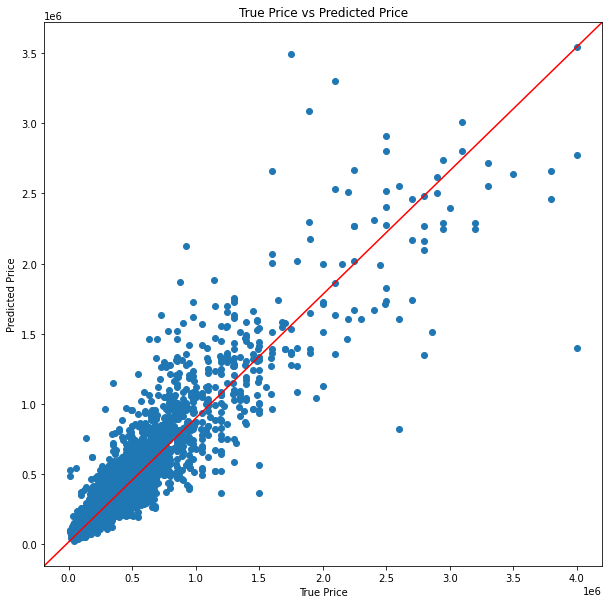

In [28]:
# Performance
performance = pd.DataFrame({'Valor Real': xg_test_y,
                            'Prediccion': xg_pred_y,
                            'Error': xg_test_y - xg_pred_y})
# View
fig, ax = plt.subplots(figsize=(10, 10))

ax.scatter(performance["Valor Real"], performance["Prediccion"])
plt.title('True Price vs Predicted Price')
plt.xlabel('True Price')
plt.ylabel('Predicted Price')

ax.plot([0,1],[0,1], transform=ax.transAxes, color="red")
plt.show()

Notamos que el modelo dió bastante bien. Obtuvimos un **r2_score** del 0.868, por lo cual podemos entender que el modelo abarca una gran variabilidad de los datos a la hora de predecir. Ademas notamos que las metricas de error dieron relativamente bajas, lo cual tambien es bueno.

Optimizacion con el **dataset ampliado**, creado en el punto anterior

Separamos el target de las variables predictoras.

In [29]:
xg_train_x_opt = x_train.drop(columns = ['property_description'])
xg_train_y_opt = y_train.loc[:, 'price']
xg_test_x_opt = x_test.drop(columns = ['property_description'])
xg_test_y_opt = y_test.loc[:, 'price']

Realizamos una optimización hiperparámetros para el nuevo dataset.

In [30]:
xg_params_grid = {'n_estimators':np.arange(1, 101),
                  'learning_rate':np.arange(0,1,0.001),
                  'max_depth':range(1,6),
                  'objective':['reg:squarederror']
                }

#Folds
folds = 5
kfoldcv = StratifiedKFold(n_splits=folds)

In [31]:
#Ramdom Search CV

xg_model_opt = xgb.XGBRegressor(random_state=7)

randomcv = RandomizedSearchCV(xg_model_opt, xg_params_grid, n_jobs=1, 
                              scoring='r2',cv=kfoldcv, n_iter=100, random_state=7)

randomcv.fit(xg_train_x_opt,xg_train_y_opt)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=XGBRegressor(random_state=7), n_iter=100, n_jobs=1,
                   param_distributions={'learning_rate': array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
       0.009, 0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017,
       0.018, 0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026,
       0.027, 0....
                                        'n_estimators': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  8

Obtenemos los mejores ***hiperparámetros***.

In [32]:
xg_params = randomcv.best_params_
print (f"Best Score: {randomcv.best_score_}\n Best Parameters: {xg_params}")

Best Score: 0.8058712470064903
 Best Parameters: {'objective': 'reg:squarederror', 'n_estimators': 65, 'max_depth': 5, 'learning_rate': 0.374}


**Best Score**: 0.8058712470064903.
**Best Parameters**: {'objective': 'reg:squarederror', 'n_estimators': 65, 'max_depth': 5, 'learning_rate': 0.374}

Entrenamos el modelo con los hiperparametros obtenidos

In [33]:
xg_model_opt = xgb.XGBRegressor(random_state=7,params=xg_params)
xg_model_opt.fit(xg_train_x_opt,xg_train_y_opt)

[00:48:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(params={'learning_rate': 0.374, 'max_depth': 5, 'n_estimators': 65,
                     'objective': 'reg:squarederror'},
             random_state=7)

In [117]:
joblib.dump(xg_model_opt, "xg_model_new_hiperparams.sav")


['xg_model_new_hiperparams.sav']

Realizamos la prediccion con los datos de test.

In [34]:
xg_pred_y_opt = xg_model_opt.predict(xg_test_x_opt)

Visualizamos las metricas del modelo obtenido.

In [35]:
r2 = r2_score(xg_test_y_opt, xg_pred_y_opt)
ase = mean_absolute_error(xg_test_y_opt, xg_pred_y_opt)
merr = max_error(xg_test_y_opt, xg_pred_y_opt)
mape = mean_absolute_percentage_error(xg_test_y_opt, xg_pred_y_opt)

print(f"r2score = {r2}, mean_absolute_error = {ase}, max_error = {merr}, mean_absolute_percentage_error = {mape} ")

r2score = 0.8415523556114822, mean_absolute_error = 44779.36968202654, max_error = 2698222.125, mean_absolute_percentage_error = 0.22644472071484387 


Graficamos los resultados para ver los predichos respecto de los verdaderos.

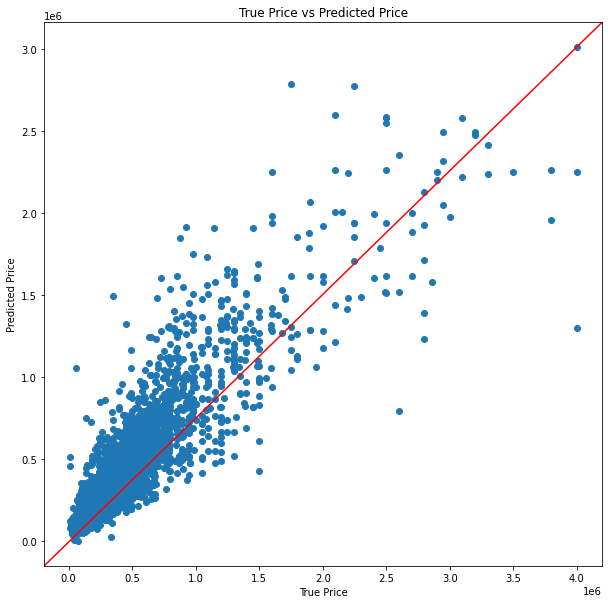

In [36]:
# Performance
performance = pd.DataFrame({'Valor Real': xg_test_y_opt,
                            'Prediccion': xg_pred_y_opt,
                            'Error': xg_test_y_opt - xg_pred_y_opt})
# View
fig, ax = plt.subplots(figsize=(10, 10))

ax.scatter(performance["Valor Real"], performance["Prediccion"])
plt.title('True Price vs Predicted Price')
plt.xlabel('True Price')
plt.ylabel('Predicted Price')

ax.plot([0,1],[0,1], transform=ax.transAxes, color="red")
plt.show()

Podemos observar que obtuvimos, nuevamente, un r2_score bastante bueno. Sin embargo, este modelo no fue tan bueno como el anterior, aunque tiene los nuevos features. Creemos que esto puede ser por el hecho de que la optimización de hiperparámetros fue realizada con una determinada semilla de RandomSearch, que no ha resultado tan buena como en el caso anterior.

# [2] ★ Redes neuronales

Cargamos los datasets que utilizaremos para entrenar la red neuronal de regresion.

In [50]:
x_r_red_train = pd.read_csv('./drive/MyDrive/datos/x_r_train.csv')
y_r_red_train = pd.read_csv('./drive/MyDrive/datos/y_r_train.csv')
x_r_red_test = pd.read_csv('./drive/MyDrive/datos/x_r_test.csv')
y_r_red_test = pd.read_csv('./drive/MyDrive/datos/y_r_test.csv')

x_r_red_test = x_r_red_test.drop('property_description', axis=1)
x_r_red_train = x_r_red_train.drop('property_description', axis=1)

## a) ◆ Regresión

Transformamos los datos para obtener mejores resultados por parte de la red. Utilizamos el Standard Scaler el cual escala los datos utilizando el promedio y la desviacion estandar del dataset.

In [52]:
sscaler=StandardScaler()
sscaler.fit(pd.DataFrame(x_r_red_train))

StandardScaler()

Una vez obtenido el scaler, llevamos a cabo la transformacion de datos.

In [53]:
x_train_transform=sscaler.transform(x_r_red_train)
x_test_transform=sscaler.transform(x_r_red_test)

Tomamos 5000 datos para validar a la hora de utilizar Keras Tunner. De esta forma obtendremos resultados mas certeros.

In [54]:
x_val = x_train_transform[0:5000]
x_train_transform = x_train_transform[5000:]

y_val = y_r_red_train[0:5000]
y_r_red_train = y_r_red_train[5000:]

Creamos la funcion que utilizara el Keras Tuner para obtener el mejor modelo. Para el caso de la mejor arquitectura, lo que hicimos fue variar entre distintas capas, con distintas funciones de activacion (relu, tanh, sigmoid) y distinta cantidad de neuronas. 
Para el caso de los hiperparametros, utilizamos como optimizador un Adam, con distintos learning rates y nos basamos en la metrica del Mean Squared Error. 

In [133]:
def build_model(hp):
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
  model = keras.Sequential()
  model.add(keras.layers.Dense(
      hp.Choice('units', [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]),
      activation=hp.Choice('activation', ["relu", "tanh", "sigmoid"])))
  model.add(keras.layers.Dense(
      hp.Choice('units', [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]),
      activation=hp.Choice('activation', ["relu", "tanh", "sigmoid"])))
  model.add(keras.layers.Dense(1, activation='relu'))
  model.compile(loss='mse', metrics=[tf.keras.metrics.MeanSquaredError()], optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate))
  return model

Utilizamos la funcion plot_regression para plotear los graficos y comparar los valores predichos por la red con los valores reales. Tambien printeamos las metricas de r2_score y mean squared error. 

In [56]:
def plot_regression(modelo, x, y, index, title="",xlabel="x",ylabel="y"):
    plt.figure()

    y_pred = modelo.predict(x)

    print("r2 score: ", r2_score(y, y_pred))
    print("mean squared error: ", mean_squared_error(y, y_pred))

    plt.plot(pd.DataFrame(x_test_transform)[index],y,"o",label="Valores verdaderos")
    plt.plot(pd.DataFrame(x_test_transform)[index],y_pred,"x",label="Valores estimados")
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()

Utilizamos el metodo RandomSearch de Keras Tuner para encontrar la mejor red neuronal con la arquitectura e hiperparamatros definidos en build_model. A su vez definimos 100 epocas y 25 trials para obtener un buen resultado sin escalar tanto en complejidad temporal.

In [134]:
keras_tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=50, seed=4344354)

keras_tuner.search(x_train_transform, y_r_red_train, epochs=100, validation_data=(x_val, y_val), batch_size=1000)
best_model = keras_tuner.get_best_models()[0]
best_model

Trial 50 Complete [00h 00m 21s]
val_loss: 140899958784.0

Best val_loss So Far: 35550621696.0
Total elapsed time: 00h 15m 21s


Fiteamos el modelo obtenido con los datos de entrenamiento. 

Ploteamos el grafico de la latitud transformada con el precio (predicho y real) para observar el desempeño de nuestra red neuronal con datos de test. 

542/542 [==============================] - 1s 1ms/step
r2 score:  0.6215172358843614
mean squared error:  22339035669.839287


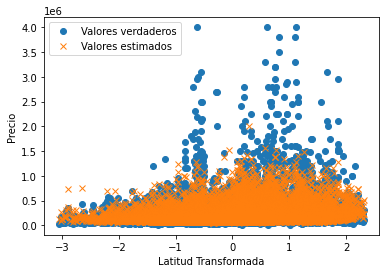

In [135]:
plot_regression(best_model, x_test_transform, y_r_red_test, 0, xlabel="Latitud Transformada", ylabel="Precio")

Ploteamos el grafico de la longitud transformada con el precio (predicho y real) para observar el desempeño de nuestra red neuronal con datos de test. 

542/542 [==============================] - 1s 1ms/step
r2 score:  0.6215172358843614
mean squared error:  22339035669.839287


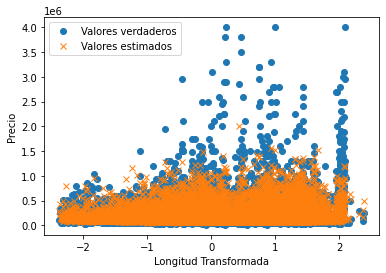

In [136]:
plot_regression(best_model, x_test_transform, y_r_red_test, 1, xlabel="Longitud Transformada", ylabel="Precio")

Ploteamos el grafico de la superficie total transformada con el precio (predicho y real) para observar el desempeño de nuestra red neuronal con datos de test. 

542/542 [==============================] - 1s 1ms/step
r2 score:  0.6215172358843614
mean squared error:  22339035669.839287


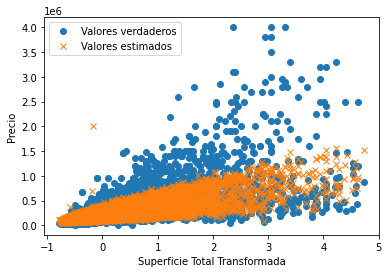

In [137]:
plot_regression(best_model, x_test_transform, y_r_red_test, 7, xlabel="Superficie Total Transformada", ylabel="Precio")

Ploteamos el grafico de la superficie cubierta transformada con el precio (predicho y real) para observar el desempeño de nuestra red neuronal con datos de test. 

542/542 [==============================] - 1s 988us/step
r2 score:  0.6215172358843614
mean squared error:  22339035669.839287


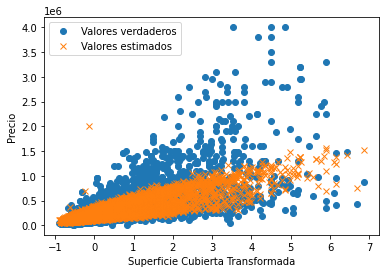

In [138]:
plot_regression(best_model, x_test_transform, y_r_red_test, 8, xlabel="Superficie Cubierta Transformada", ylabel="Precio")


Como podemos ver obtuvimos como metricas, un r2_score aproximadamente igual a 0.62 y un mean squared error de 22339035669. 

Vamos a probar otro modelo de red neuronal, cambiando un poco los parametros del Random Search. En este caso subiremos levemente la cantidad de neuronas y el learning_rate. Por otro lado, decidimos dejar constante la funcion de activacion "relu" ya que notamos que fue la que mejor funciono en el modelo anterior.

Borramos el directorio con el modelo anterior.

In [122]:
! rm -r untitled_project/

Creamos la funcion que utilizara el Keras Tuner para obtener el mejor modelo. Esta vez, para el caso de la mejor arquitectura, lo que hicimos fue variar entre distintas capas, con una unica funcion de activacion (relu) tal cual se menciono previamente. Para las neuronas decidimos aumentar levemente la cantidad. 
Para el caso de los hiperparametros, utilizamos como optimizador un Adam, con  learning rates mas grandes a los utilizados previamente y nos basamos en la metrica del Mean Squared Error. 

In [67]:
def build_model2(hp):
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 5e-2, 1e-1])
  model = keras.Sequential()
  model.add(keras.layers.Dense(
      hp.Choice('units', [12, 15, 20, 25]),
      activation=hp.Choice('activation', ["relu"])))
  model.add(keras.layers.Dense(
      hp.Choice('units', [12, 15, 20, 25]),
      activation=hp.Choice('activation', ["relu"])))
  model.add(keras.layers.Dense(1, activation='relu'))
  model.compile(loss='mse', metrics=[tf.keras.metrics.MeanSquaredError()], optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate))
  return model

Utilizamos el metodo RandomSearch de Keras Tuner para encontrar la mejor red neuronal con la arquitectura e hiperparamatros definidos en build_model2. A su vez definimos 100 epocas y 25 trials tal como usamos previamente.

In [123]:
keras_tuner = kt.RandomSearch(
    build_model2,
    objective='val_loss',
    max_trials=25, seed=4344354)

keras_tuner.search(x_train_transform, y_r_red_train, epochs=100, validation_data=(x_val, y_val), batch_size=1000)
best_model = keras_tuner.get_best_models()[0]
best_model

Trial 10 Complete [00h 00m 19s]
val_loss: 34372575232.0

Best val_loss So Far: 21891823616.0
Total elapsed time: 00h 03m 20s


Fiteamos el modelo obtenido con los datos de entrenamiento. 

Ploteamos el grafico de la latitud transformada con el precio (predicho y real) para observar el desempeño de nuestra red neuronal con datos de test. 

542/542 [==============================] - 1s 997us/step
r2 score:  0.7660604085777636
mean squared error:  13807722234.273956


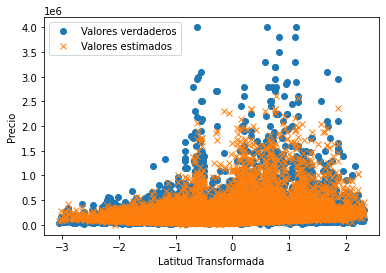

In [124]:
plot_regression(best_model, x_test_transform, y_r_red_test, 0, xlabel="Latitud Transformada", ylabel="Precio")

Ploteamos el grafico de la longitud transformada con el precio (predicho y real) para observar el desempeño de nuestra red neuronal con datos de test. 

542/542 [==============================] - 1s 1ms/step
r2 score:  0.7660604085777636
mean squared error:  13807722234.273956


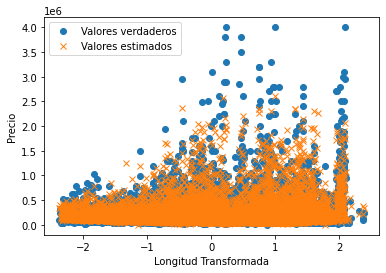

In [125]:
plot_regression(best_model, x_test_transform, y_r_red_test, 1, xlabel="Longitud Transformada", ylabel="Precio")

Ploteamos el grafico de la superficie total transformada con el precio (predicho y real) para observar el desempeño de nuestra red neuronal con datos de test. 

542/542 [==============================] - 1s 1ms/step
r2 score:  0.7660604085777636
mean squared error:  13807722234.273956


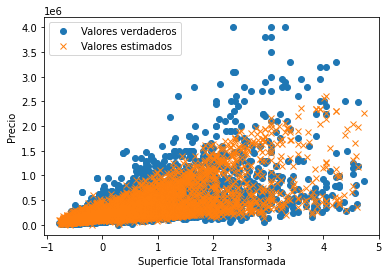

In [126]:
plot_regression(best_model, x_test_transform, y_r_red_test, 7, xlabel="Superficie Total Transformada", ylabel="Precio")

Ploteamos el grafico de la superficie cubierta transformada con el precio (predicho y real) para observar el desempeño de nuestra red neuronal con datos de test. 

542/542 [==============================] - 1s 1ms/step
r2 score:  0.7660604085777636
mean squared error:  13807722234.273956


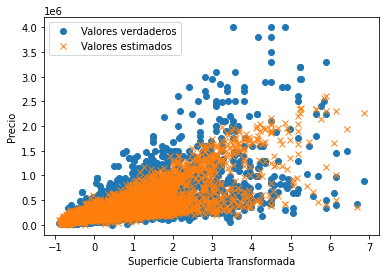

In [127]:
plot_regression(best_model, x_test_transform, y_r_red_test, 8, xlabel="Superficie Cubierta Transformada", ylabel="Precio")


Notamos que al aumentar la cantidad de neuronas y learning_rate, el modelo mejora sustancialmente. 

Borramos el directorio con el modelo anterior.

In [129]:
! rm -r untitled_project/

Por ultimo, haremos al prueba de una red neuronal con 1000 neuronas y veremos que tanto mejora respecto a los anteriores.

In [74]:
def build_model3(hp):
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 5e-2, 1e-1])
  model = keras.Sequential()
  model.add(keras.layers.Dense(
      hp.Choice('units', [1000]),
      activation=hp.Choice('activation', ["relu"])))
  model.add(keras.layers.Dense(
      hp.Choice('units', [1000]),
      activation=hp.Choice('activation', ["relu"])))
  model.add(keras.layers.Dense(1, activation='relu'))
  model.compile(loss='mse', metrics=[tf.keras.metrics.MeanSquaredError()], optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate))
  return model

Utilizamos el metodo RandomSearch de Keras Tuner para encontrar la mejor red neuronal con la arquitectura e hiperparamatros definidos en build_model3. A su vez definimos 100 epocas y 25 trials tal como usamos previamente.

In [75]:
keras_tuner = kt.RandomSearch(
    build_model3,
    objective='val_loss',
    max_trials=25, seed=4344354)

keras_tuner.search(x_train_transform, y_r_red_train, epochs=100, validation_data=(x_val, y_val), batch_size=1000)
best_model = keras_tuner.get_best_models()[0]
best_model

Trial 3 Complete [00h 10m 23s]
val_loss: 12766168064.0

Best val_loss So Far: 12359109632.0
Total elapsed time: 00h 31m 08s


Fiteamos el modelo obtenido con los datos de entrenamiento. 

Ploteamos el grafico de la latitud transformada con el precio (predicho y real) para observar el desempeño de nuestra red neuronal con datos de test. 

542/542 [==============================] - 2s 4ms/step
r2 score:  0.8473647403501399
mean squared error:  9008929423.141783


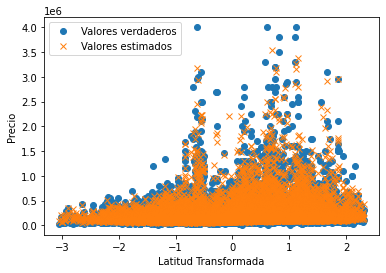

In [76]:
plot_regression(best_model, x_test_transform, y_r_red_test, 0, xlabel="Latitud Transformada", ylabel="Precio")

Ploteamos el grafico de la longitud transformada con el precio (predicho y real) para observar el desempeño de nuestra red neuronal con datos de test. 

542/542 [==============================] - 1s 3ms/step
r2 score:  0.8473647403501399
mean squared error:  9008929423.141783


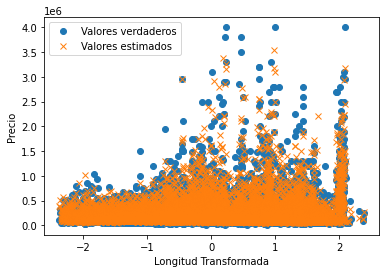

In [77]:
plot_regression(best_model, x_test_transform, y_r_red_test, 1, xlabel="Longitud Transformada", ylabel="Precio")

Ploteamos el grafico de la superficie total transformada con el precio (predicho y real) para observar el desempeño de nuestra red neuronal con datos de test. 

542/542 [==============================] - 2s 3ms/step
r2 score:  0.8473647403501399
mean squared error:  9008929423.141783


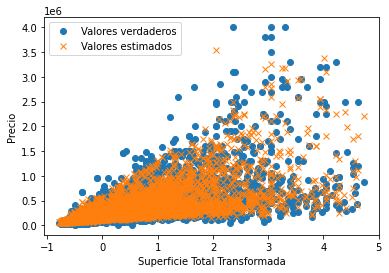

In [78]:
plot_regression(best_model, x_test_transform, y_r_red_test, 7, xlabel="Superficie Total Transformada", ylabel="Precio")

Ploteamos el grafico de la superficie cubierta transformada con el precio (predicho y real) para observar el desempeño de nuestra red neuronal con datos de test. 

542/542 [==============================] - 1s 3ms/step
r2 score:  0.8473647403501399
mean squared error:  9008929423.141783


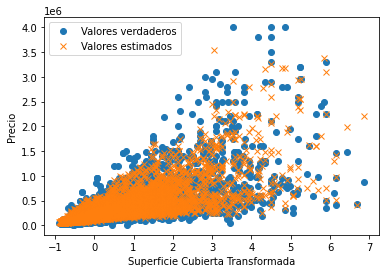

In [79]:
plot_regression(best_model, x_test_transform, y_r_red_test, 8, xlabel="Superficie Cubierta Transformada", ylabel="Precio")


Notamos que con 1000 neuronas el modelo mejoro bastante. Sin embargo, nos parece que esta arquitectura es demasiado compleja para el alcance de este TP.

## b) ◆ Clasificación


Borramos el directorio con el modelo anterior.

In [131]:
! rm -r untitled_project/

Importamos los datasets para clasificacion

In [80]:
clasif_y_train = pd.read_csv("./drive/MyDrive/datos/clasif_y_train.csv")
clasif_y_test = pd.read_csv("./drive/MyDrive/datos/clasif_y_test.csv")
clasif_x_train = pd.read_csv("./drive/MyDrive/datos/clasif_x_train.csv")
clasif_x_test = pd.read_csv("./drive/MyDrive/datos/clasif_x_test.csv")

Separamos en validation. Como ya tenemos separado en train y test (con test de tamaño 20% del dataset original), al partir a train en train y validation, me reservo un 16% del total de dataset para validation

In [81]:
clasif_x_train, clasif_x_val, clasif_y_train, clasif_y_val  = train_test_split(clasif_x_train, clasif_y_train, test_size=0.2, random_state=1) # 0.2 x 0.8 = 0.16

Preprocesamos los datasets, usando one hot encoding para las variables de target.

In [82]:
enc = OneHotEncoder()
y_train_encoder = enc.fit_transform(clasif_y_train[:].to_numpy()).toarray()
y_test_encoder = enc.transform(clasif_y_test[:].to_numpy()).toarray()
clasif_y_val =  enc.transform(clasif_y_val[:].to_numpy()).toarray()

Escalamos los datos para obtener un mejor resultado al utilizar la red neuronal. En este caso utilizamos el StandardScaler para dicho cometido.

In [83]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(clasif_x_train)
x_test_scaled = scaler.transform(clasif_x_test)
clasif_x_val = scaler.transform(clasif_x_val)

Seteamos la variable de cantidad de clases, que la vamos a utilizar para definir la cantidad de neuronas de la capa de salida de nuestra red neuronal.

In [84]:
cant_clases=3

Utilizamos la función build_model para poder realizar una optimización de arquitectura e hiperparámetros para nuestra red. Variamos tanto la cantidad de neuronas, como las funciones de activación y el learning_rate del optimizador que utilizamos en este caso, el cual es Adam.

Elegimos este optimizador porque es uno de los que da mejores resultados.

In [85]:
def build_model(hp):
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
  model = keras.Sequential()
  model.add(keras.layers.Dense(
      hp.Choice('units', [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]),
      activation=hp.Choice('activation', ["relu", "tanh", "sigmoid"])))
  model.add(keras.layers.Dense(
      hp.Choice('units', [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]),
      activation=hp.Choice('activation', ["relu", "tanh", "sigmoid"])))
  model.add(keras.layers.Dense(cant_clases, activation='softmax'))

  model.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate), 
      loss='categorical_crossentropy', 
      metrics=['accuracy'], 
    )
  
  return model

Con la función plot_clasificaction lo que hacemos es predecir y comparar los valores para poder tener una mejor visión de los resultados que obtenemos al utilizar la red neuronal y así poder evaluar su performance sobre el conjunto de datos actual.

Utilizamos una matriz de confusión para poder representar la clasficación que obtuvimos respecto de la clasificación real.

Mostramos además, el resultado de las métricas Accuracy, Recall y F1-score.

In [87]:
def plot_clasification(modelo, x, y, y_pred):
    y_pred=np.argmax(y_pred,axis=1).tolist()
    y = y['tipo_precio_encoded'].values.tolist()
    
    cm = confusion_matrix(y,y_pred)
    sns.heatmap(cm, cmap='Blues', annot=True, fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('True')
  
    print("Accuracy: ",accuracy_score(y, y_pred))
    print("Recall: ",recall_score(y, y_pred, average='weighted'))
    print("f1 score: ",f1_score(y, y_pred, average='weighted'))

Utilizamos el metodo RandomSearch de Keras Tuner para encontrar la mejor red neuronal con la arquitectura e hiperparamatros definidos en build_model. A su vez definimos 100 epocas y 50 trials para obtener un buen resultado sin escalar tanto en complejidad temporal.

In [88]:
keras_tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=50, seed=1234567)

keras_tuner.search(x_train_scaled, y_train_encoder, epochs=100, validation_data=(clasif_x_val, clasif_y_val), batch_size=1000)
best_clasif_model = keras_tuner.get_best_models()[0]
best_clasif_model

Trial 33 Complete [00h 00m 14s]
val_loss: 0.9393371939659119

Best val_loss So Far: 0.8327386379241943
Total elapsed time: 00h 10m 17s


Realizamos la predicción con la red neuronal que mejor resultó utilizando **Keras Tuner**.

In [89]:
y_clasif_predic = best_clasif_model.predict(x_test_scaled)

534/534 [==============================] - 1s 971us/step


In [90]:
y_1 = clasif_y_test['tipo_precio_encoded'].values.tolist() 

Utilizamos la función plot_clasification para mostrar los resultados obtenidos, pasándole como parámetro el modelo, los datos de test y las predicciones realizadas anteriormente.

Accuracy:  0.609271523178808
Recall:  0.609271523178808
f1 score:  0.5987523868880338


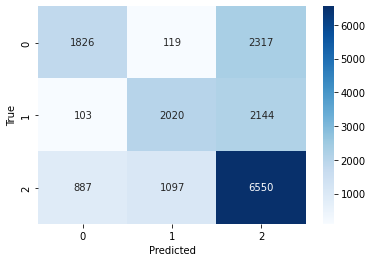

In [91]:
plot_clasification(best_clasif_model, x_test_scaled, clasif_y_test, y_clasif_predic)

RESULTADOS:
Accuracy:  0.609271523178808
Recall:  0.609271523178808
f1 score:  0.5987523868880338

# [3] ★ Ensambles de modelos

## a) ◆ Voting (Clasificación)

In [92]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib

Traemos datasets para clasificación

In [94]:
# Datasets de clasificación - Estan en 80-20
x_train_not_reduced =  pd.read_csv('./drive/MyDrive/datos/clasif_x_train.csv')
x_test_not_reduced =  pd.read_csv('./drive/MyDrive/datos/clasif_x_test.csv')
y_train_not_reduced =  pd.read_csv('./drive/MyDrive/datos/clasif_y_train.csv')
y_test_not_reduced =  pd.read_csv('./drive/MyDrive/datos/clasif_y_test.csv')

Traemos los modelos del TP anterior.

In [96]:
# Clasificadores

random_forest_not_reduced_model = joblib.load("./drive/MyDrive/datos/random_forest_not_reduced.sav")
gradient_boost_not_reduced_model = joblib.load("./drive/MyDrive/datos/gradient_boost_not_reduced.sav")
decission_tree_classifier_not_reduced_model = joblib.load("./drive/MyDrive/datos/decission_tree_classifier_not_reduced.sav")

Para la votación, vimos que el modelo con el mejor resultado fue el de Random Forest, con 0,7 de Acuraccy. Por lo tanto, decidimos realizar una votación "Hard" ponderada, donde Random Forest, al ser el mejor modelo, tiene doble voto.

In [98]:
# Creamos ensamble de Votación.
vot_clf = VotingClassifier(estimators = [('rf', random_forest_not_reduced_model), ('gb', gradient_boost_not_reduced_model), ('dt', decission_tree_classifier_not_reduced_model)], voting = 'hard', weights = [2,1,1])


# Entrenamos el ensamble.
vot_clf.fit(x_train_not_reduced, y_train_not_reduced)

# Evaluamos en conjunto de test.
voting_pred = vot_clf.predict(x_test_not_reduced)
accuracy_score(y_test_not_reduced, voting_pred)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6935474418332064

Realizamos la matriz de confusion

Text(33.0, 0.5, 'True')

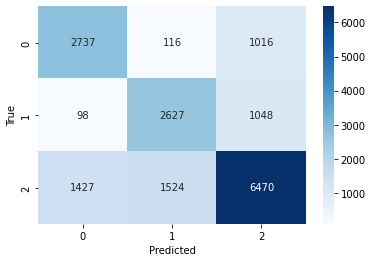

In [99]:
cm = confusion_matrix(voting_pred, y_test_not_reduced)

sns.heatmap(cm, cmap='Blues', annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [100]:
accuracy=accuracy_score(y_test_not_reduced,voting_pred)
recall=recall_score(y_test_not_reduced,voting_pred, average='weighted')
f1=f1_score(y_test_not_reduced,voting_pred, average='weighted')

print("Accuracy: "+str(accuracy))
print("Recall: "+str(recall))
print("f1 score: "+str(f1))

Accuracy: 0.6935474418332064
Recall: 0.6935474418332064
f1 score: 0.6920279438210066


Observamos que el ensamble tuvo muy buenos resultados. Basándonos en las métricas accuracy, recall y f1-score, los resultados fueron mejores que al utilizar redes neuronales.

Atribuímos este resultado a que en el caso de estos modelos ensamblados hemos logrado conseguir buenos hiperparámetros para los mismos. En cambio, en redes neuronales no lo conseguimos, ni tampoco arquitectura óptima.

Cabe destacar que en ninguno de los dos casos, se produjo overfitting por parte del entrenamiento realizado en los modelos.



## b) ◆ Stacking (Regresión)

In [101]:
import numpy as np 
import pandas as pd
from collections import defaultdict

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
%matplotlib inline
import sklearn

from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegressionCV

from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold

Traemos los modelos regresores del TP anterior.

In [103]:
# Regresores

knn_not_reduced_model = joblib.load("./drive/MyDrive/datos/knn_not_reduced.sav")
adaboost_not_reduced_model = joblib.load("./drive/MyDrive/datos/adaboost_not_reduced.sav")
xg_boost_not_reduced_model = joblib.load("./drive/MyDrive/datos/xg_boost_not_reduced.sav")

[02:45:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Creamos el modelo utilizando los regresores del TP anterior y como modelo elector elegimos una regresión lineal.

In [104]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

#Modelos Base
base_models = [('xgboost', xg_boost_not_reduced_model),
               ('adaboost', adaboost_not_reduced_model),
               ('knn', knn_not_reduced_model)]

#Meta Modelo
meta_model = LinearRegression()

#Ensemble Stacking
stacking_model = StackingRegressor(estimators=base_models, 
                                    final_estimator=meta_model, 
                                    passthrough=True, 
                                    cv=5,
                                    verbose=2)

Quitamos las columnas que no contienen valores numéricos.

In [105]:
x_train = x_train.drop("property_description", axis=1)
x_test = x_test.drop("property_description", axis=1)

Fiteamos y predecimos utilizando el modelo ya creado.

In [107]:
stacking_model.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_stacking.py:758: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[02:47:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:47:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


[02:47:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:47:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:47:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:47:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   16.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   13.1s finished


StackingRegressor(cv=5,
                  estimators=[('xgboost',
                               XGBRegressor(missing=nan,
                                            params={'learning_rate': 0.158,
                                                    'max_depth': 5,
                                                    'n_estimators': 64,
                                                    'objective': 'reg:squarederror'},
                                            random_state=7)),
                              ('adaboost',
                               AdaBoostRegressor(learning_rate=0.77,
                                                 n_estimators=1,
                                                 random_state=4923)),
                              ('knn',
                               KNeighborsRegressor(n_neighbors=31, p=1,
                                                   weights='distance'))],
                  final_estimator=LinearRegression(), passthrough=True,
          

In [108]:
y_pred = stacking_model.predict(x_test)

Obtenemos el target para poder obtener las métricas.

In [109]:
y_test_stacking = y_test.loc[:, 'price']

In [110]:
# Vemos metricas

r2 = r2_score(y_test_stacking, y_pred)
ase = mean_absolute_error(y_test_stacking, y_pred)
merr = max_error(y_test_stacking, y_pred)
mape = mean_absolute_percentage_error(y_test_stacking, y_pred)

print(f"r2score = {r2}, mean_absolute_error = {ase}, max_error = {merr}, mean_absolute_percentage_error = {mape} ")

r2score = 0.8633281303407732, mean_absolute_error = 41436.39063105248, max_error = 2614416.0679218257, mean_absolute_percentage_error = 0.20620029006501972 


Graficamos los valores precichos con los reales para poder relacionar la precisión.

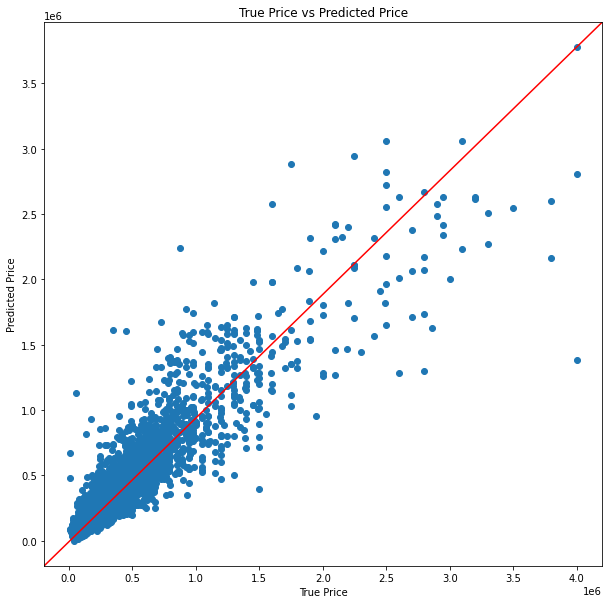

In [111]:
# Performance
performance = pd.DataFrame({'Valor Real': y_test_stacking,
                            'Prediccion': y_pred,
                            'Error': y_test_stacking - y_pred})

# View
fig, ax = plt.subplots(figsize=(10, 10))

ax.scatter(performance["Valor Real"], performance["Prediccion"])
plt.title('True Price vs Predicted Price')
plt.xlabel('True Price')
plt.ylabel('Predicted Price')

ax.plot([0,1],[0,1], transform=ax.transAxes, color="red")
plt.show()

Observamos que el ensamble tuvo muy buenos resultados. Obtuvimos un **r2_score** del 0.863, si lo comparamos con el modelo de XGboost que hicimos anteriomente, los resultados fueron ligeramente mejores en el caso de la utilización de hiperparámetros del dataset ampliado, pero ligeramente peores en el caso de la utilización de hiperparámetros del TP1.

Por otro lado, si lo comparamos con redes neuronales, notamos una gran diferencia, en el caso de la red con pocas neuronas. En ese caso, obtuvimos un **r2_score** de aproximadamente 0.63. 
Comparando con los otros dos modelos de redes, notamos que la diferencia no es tanta pero aun asi sigue siendo mejor el stacking.
Creemos que esto se debe a la cantidad de épocas usadas y la optimización realizada por el Keras Tuner para nuestros trials.

# [4] ★ Conclusiones

A lo largo del TP, pudimos observar y analizar los distintos conceptos vistos en las clases; como redes neuronales, NLP y ensamble de modelos.

Utilizando regex para NLP, junto con algoritmia simple, pudimos ver el valor que puede llegar a aportar un dato que en un principio parece irrelevante y que no observable a simple vista. Es importante definir un buen criterio para lograr la extracción de este feature, de la manera más óptima y eficiente posible. Como pudimos observar en nuestros resultados, los modelos de XGBOOST que usaron los datasets ampliados con estas nuevas características, tuvieron un rendimiento mucho mejor que los modelos utilizados en el primer trabajo práctico. Lo cual refuerza la idea mencionada previamente.

En cuanto a redes neuronales, notamos que estos modelos son mucho más complejos, tanto de programar como a nivel algorítmico. En nuestra primera iteración, a la hora de implementar las redes neuronales, nos encontramos con muy malos resultados. Esto se debió al hecho de querer obtener una buena arquitectura de manera manual. Una vez utilizada la librería Keras Tuner, los resultados empezaron a mejorar. Tal es así, que para regresión pudimos mejorar nuestro r2 score de casi 0 a 0.6. Esto es así ya que este optimizador nos permite variar la cantidad de capas y neuronas, y obtener la que mejor se adapta a nuestro dataset. Notamos también que si retocábamos un poco los hiperparámetros posibles, el modelo mejoraba. Esto se vio reflejado en la función de activación "ReLu", que resultó ser mucho mejor para el problema de regresión que las funciones "tanh" y "sigmoid". Aumentar la cantidad de neuronas, también fue de ayuda para mejorar los resultados. Sin embargo hay que saber cuándo parar, ya que no queremos que la complejidad computacional resulte muy alta, innecesariamente.

Con respecto a los ensambles, pudimos observar que mejoran el rendimiento en comparación a un modelo aislado. Según nuestros resultados, el modelo de Stacking se adaptó bastante bien a nuestro problema de regresión. Por otro lado, si bien el modelo de Voting dio buenos resultados, no resultó tan bueno como Stacking, más allá de que éstos fueron usados con distintos objetivos.

Por otro lado, vamos a comentar algunos aspectos que nos hubiese gustado analizar. Hubiese sido interesante realizar una red neuronal recurrente de tipo LSTM, utilizando datos de propiedades de años previos.

Mas allá de eso, creemos que pudimos explorar y llevar a la práctica los conocimientos que fueron enseñados en las clases.